# HW2  Linear Regression and Logistisc Regression 

# Karanvir Singh Assignment

## Due on 4/13/2020: 23:59 pm

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### This HW is split into two part. In Part A we will be building a Linear Regression model using housing data while in Part B, we will build a Logistic Regression model. Note that some questions will carry more weights than the others. Question 3, 4, 7 and 8 will carry most weights  

### Part A

#### First let's build a Linear Regression model for a housing dataset

In [181]:
housing = pd.read_csv("USA_housing.csv")
housing.head()

Income  HouseAge  NumberOfRooms  AreaNumberOfBedrooms   Population  \
0  79545.45857  5.682861       7.009188                  4.09  23086.80050   
1  79248.64245  6.002900       6.730821                  3.09  40173.07217   
2  61287.06718  5.865890       8.512727                  5.13  36882.15940   
3  63345.24005  7.188236       5.586729                  3.26  34310.24283   
4  59982.19723  5.040555       7.839388                  4.23  26354.10947   

          Price                                            Address  
0  1.059034e+06  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  1.505891e+06  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  1.058988e+06  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3  1.260617e+06                          USS Barnett\nFPO AP 44820  
4  6.309435e+05                         USNS Raymond\nFPO AE 09386

### we can use simple scatter to check how the house price depends on different variables


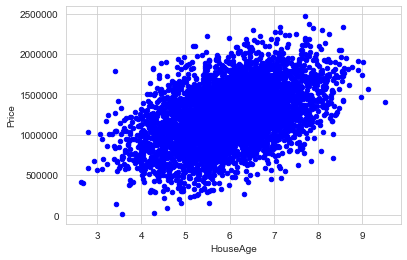

In [182]:
housing.plot(kind='scatter', x = "HouseAge", y = "Price", color = "blue")

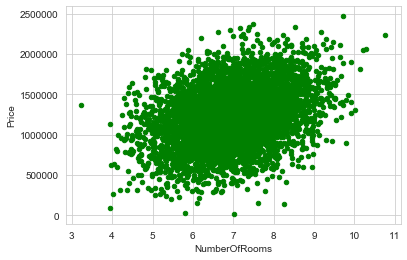

In [183]:
housing.plot(kind='scatter', x = "NumberOfRooms", y = "Price", color = "green")

### Question 1: Use a pairplot to see all the scatter plots with the numerical variables in one grid

Income  HouseAge  NumberOfRooms  AreaNumberOfBedrooms  \
Income                1.000000 -0.002007      -0.011032              0.019788   
HouseAge             -0.002007  1.000000      -0.009428              0.006149   
NumberOfRooms        -0.011032 -0.009428       1.000000              0.462695   
AreaNumberOfBedrooms  0.019788  0.006149       0.462695              1.000000   
Population           -0.016234 -0.018743       0.002040             -0.022168   
Price                 0.639734  0.452543       0.335664              0.171071   

                      Population     Price  
Income                 -0.016234  0.639734  
HouseAge               -0.018743  0.452543  
NumberOfRooms           0.002040  0.335664  
AreaNumberOfBedrooms   -0.022168  0.171071  
Population              1.000000  0.408556  
Price                   0.408556  1.000000

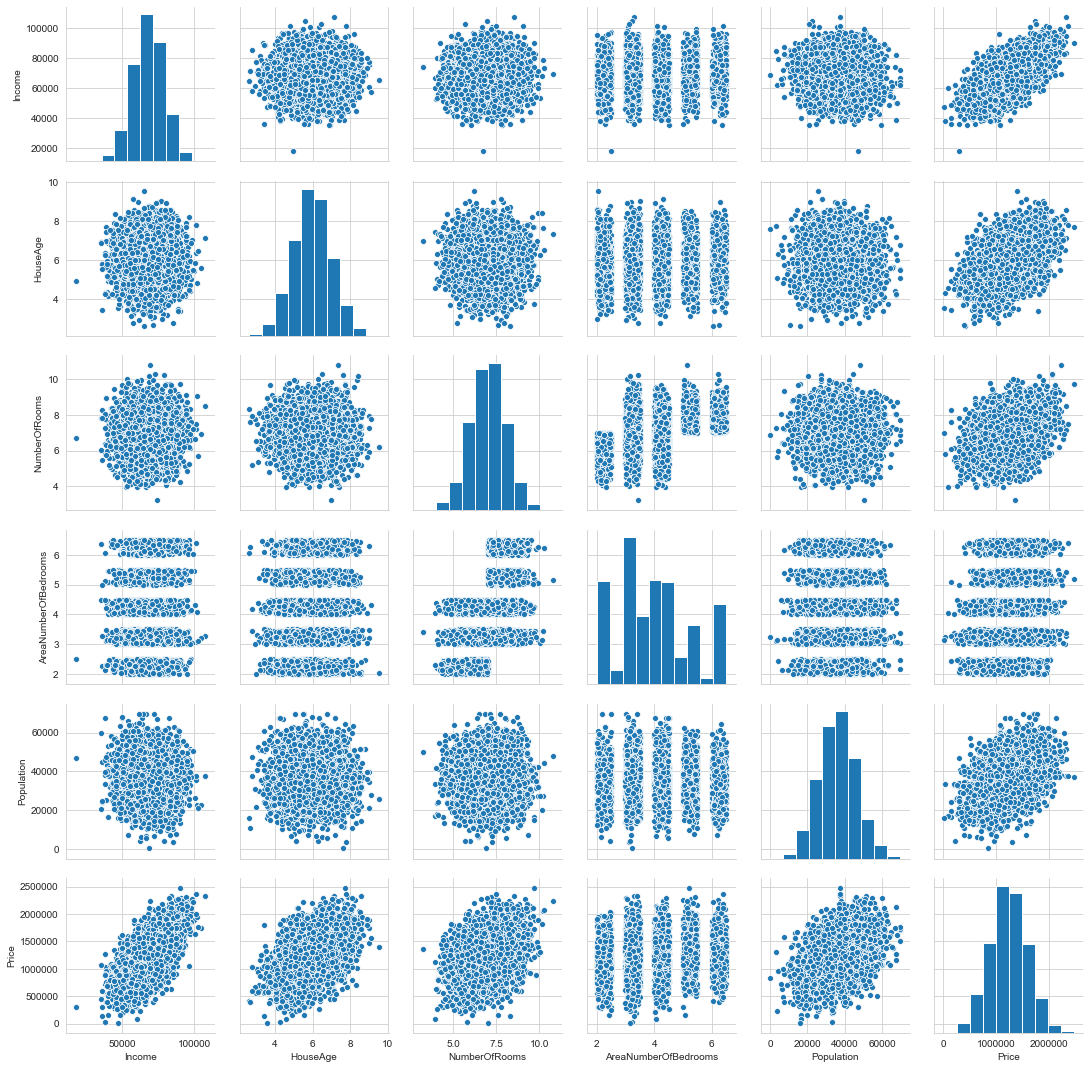

In [184]:
sns.pairplot(data=housing)
housing.corr()

### Question 2: Use the above pairplot as well as calculating the correlation, pick one variable that affects the house price the most

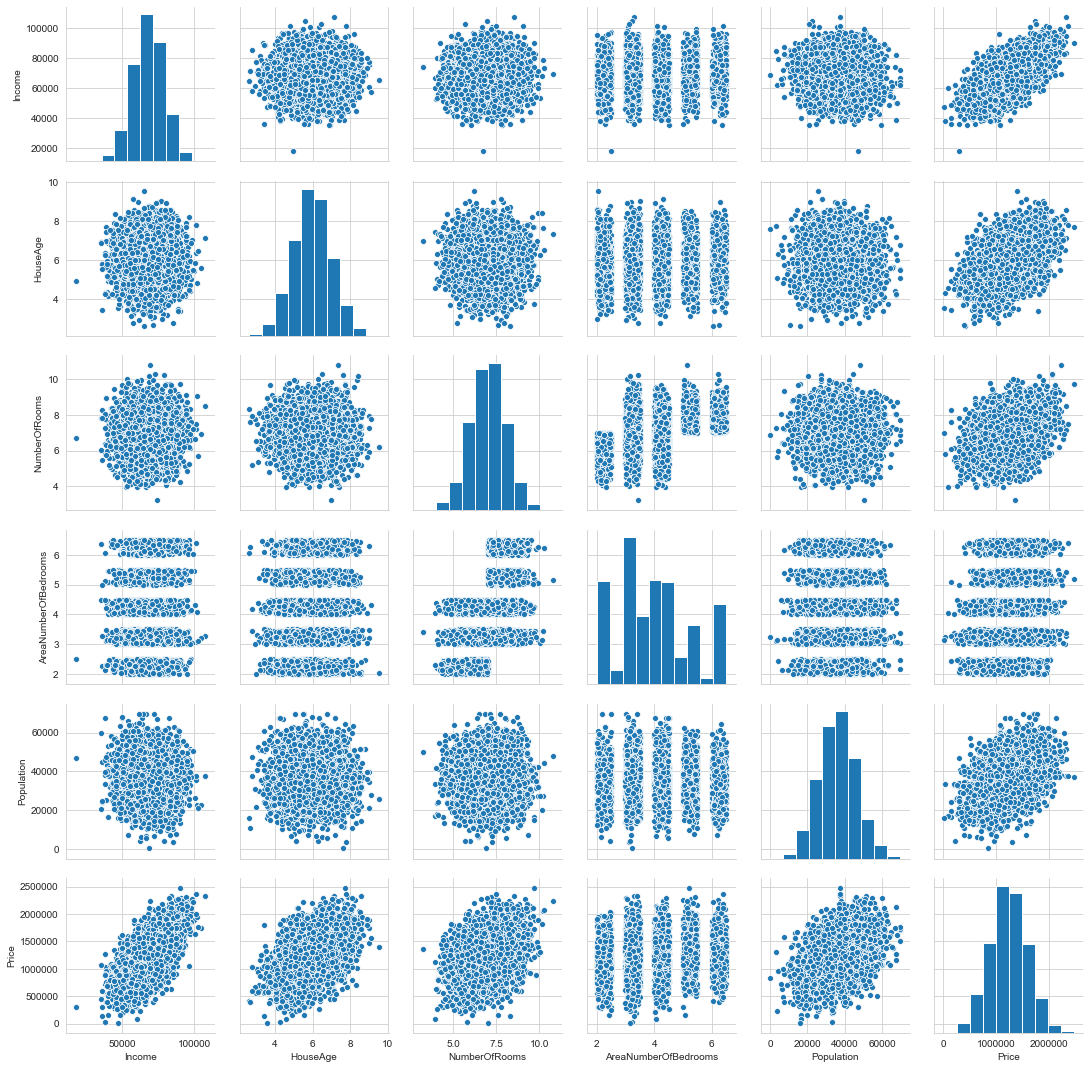

In [185]:
sns.pairplot(data=housing)
#income affects house price the most because money rules the world

In [186]:
housing.corr()


Income  HouseAge  NumberOfRooms  AreaNumberOfBedrooms  \
Income                1.000000 -0.002007      -0.011032              0.019788   
HouseAge             -0.002007  1.000000      -0.009428              0.006149   
NumberOfRooms        -0.011032 -0.009428       1.000000              0.462695   
AreaNumberOfBedrooms  0.019788  0.006149       0.462695              1.000000   
Population           -0.016234 -0.018743       0.002040             -0.022168   
Price                 0.639734  0.452543       0.335664              0.171071   

                      Population     Price  
Income                 -0.016234  0.639734  
HouseAge               -0.018743  0.452543  
NumberOfRooms           0.002040  0.335664  
AreaNumberOfBedrooms   -0.022168  0.171071  
Population              1.000000  0.408556  
Price                   0.408556  1.000000

# Income affects house price the most because money rules the world

### Question 3: Use that variable to build a one-variable Linear Regression model of the house price. Make sure you split the data between Training and Testing set first, Save 20% as your testing data. Show your R-square and RMSE

In [187]:
from sklearn.linear_model import LinearRegression

In [188]:
X= housing['Income'].values.reshape(-1,1)
Y= housing['Price'].values.reshape(-1,1)
model1 = LinearRegression()
model1.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [196]:
print(model1.intercept_)
print(model1.coef_)

[-221579.47822252]
[[21.19548317]]


In [189]:
# Split Data Values

In [190]:
Y_pred=model1.predict(X)

In [191]:
Y_pred

array([[1464424.95032392],
       [1458133.78924722],
       [1077429.52286549],
       ...,
       [1122016.75902953],
       [1219741.59376302],
       [1166948.9559213 ]])

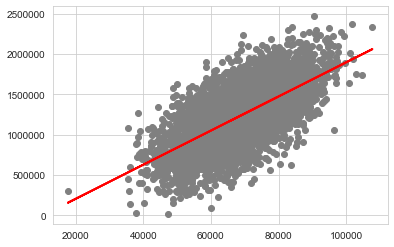

In [192]:
plt.scatter(X,Y, color='gray')
plt.plot(X,Y_pred, color='red', linewidth=2)
plt.show()

In [193]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [194]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
model2 = LinearRegression()
model2.fit(X,Y)

(4000, 1)
(1000, 1)
(4000, 1)
(1000, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

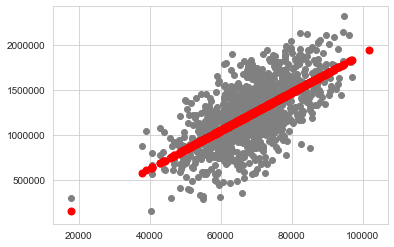

In [195]:
Y_pred=model2.predict(X_test)
plt.scatter(X_test, Y_test, color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)

In [171]:
from sklearn import metrics
print('R-quared: ', metrics.r2_score(Y_test, Y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

R-quared:  0.40063040396905447
RMSE:  272178.9400943155


### Question 4: Now do a 10-fold Cross Validation of your model. Does your model pass cross validation?

In [172]:
import random
for i in range(10):
    print(random.randint(1,1000))

521
679
186
610
444
472
623
299
968
219


Trial # 0: , R-Squared Value: 0.42164423623222125, Slope: [[21.16691554]], Intercept: [-217323.99602875], 


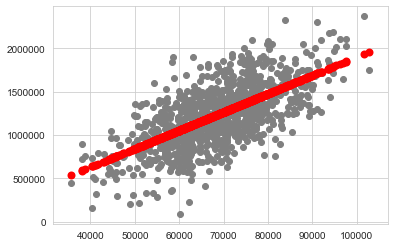

Trial # 1: , R-Squared Value: 0.4087450657075241, Slope: [[21.05336783]], Intercept: [-211906.30529752], 


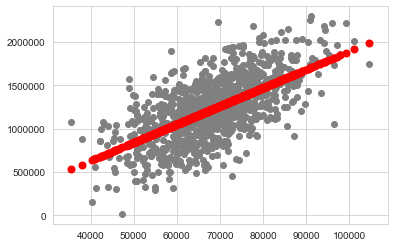

Trial # 2: , R-Squared Value: 0.40554402824178815, Slope: [[21.23241797]], Intercept: [-225234.49996088], 


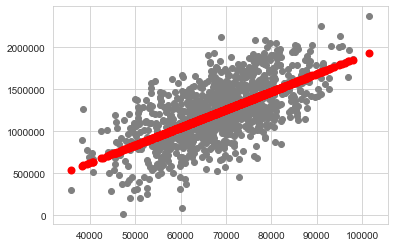

Trial # 3: , R-Squared Value: 0.41118366001618967, Slope: [[21.15983145]], Intercept: [-219478.09553175], 


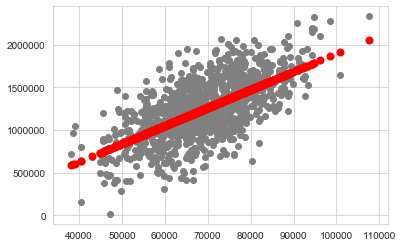

Trial # 4: , R-Squared Value: 0.42577674841456825, Slope: [[21.02221906]], Intercept: [-208612.07500548], 


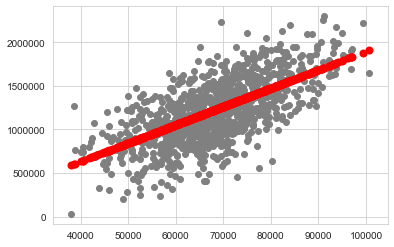

Trial # 5: , R-Squared Value: 0.4126130053664606, Slope: [[21.2777634]], Intercept: [-225180.9603759], 


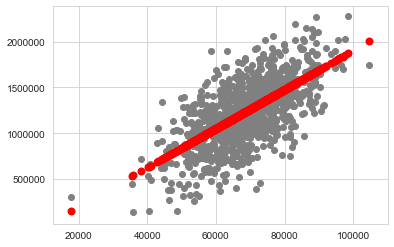

Trial # 6: , R-Squared Value: 0.4664329184705278, Slope: [[20.89836939]], Intercept: [-202593.3016335], 


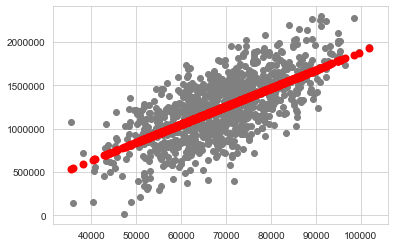

Trial # 7: , R-Squared Value: 0.44173590726775425, Slope: [[21.13548116]], Intercept: [-214914.94154912], 


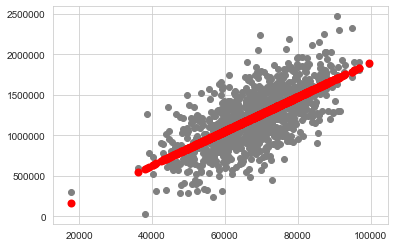

Trial # 8: , R-Squared Value: 0.3983889032285711, Slope: [[21.28725541]], Intercept: [-230845.41468452], 


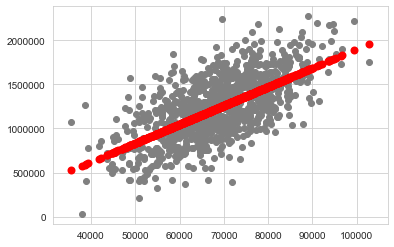

Trial # 9: , R-Squared Value: 0.4137371148255544, Slope: [[21.11627581]], Intercept: [-217035.72731578], 


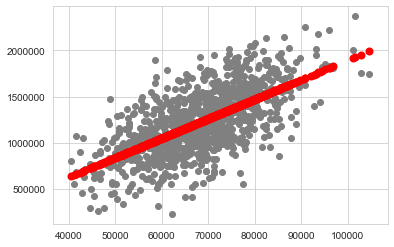

In [197]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial # {}: , R-Squared Value: {}, Slope: {}, Intercept: {}, '.format(i, metrics.r2_score(Y_test, Y_pred), model.coef_, model.intercept_))        
    
    plt.scatter(X_test, Y_test, color='gray')
    plt.scatter(X_test, Y_pred, color='red', linewidth=2)
    plt.show()

In [198]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model=LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
rdf = pd.DataFrame( {'Trial': range(10), 'Rsquare': rsquare})
rdf
    

Trial   Rsquare
0      0  0.450490
1      1  0.423650
2      2  0.402311
3      3  0.380518
4      4  0.394598
5      5  0.408517
6      6  0.405506
7      7  0.393189
8      8  0.412005
9      9  0.376872

In [199]:
print(rdf['Rsquare'].mean())

0.4047656107096656


### Good Job.

### Part B:  Let's build a Logistic Regression model using the affairs data from
https://www.statsmodels.org/dev/datasets/generated/fair.html

The goal of the HW is to see if one can predict
whether a woman on given certain attributeds, suchas age, years married, number of children etc, will particpate
in an affair or not


#### DataSet Description

From the [Statsmodels website](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html) we have the following information about the data:

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

See the original paper for more details.

In [200]:
# The dataset can be imported via the statsmodels like the following, but we are going to read from a csv file
# provided by the professor
# import statsmodels.api as sm
# orig_df = sm.datasets.fair.load_pandas().data

df = pd.read_csv("affairs2.csv")
df.head()

rate_marriage   age  yrs_married  children  religious  educ occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0       occ2   
1            3.0  27.0         13.0       3.0        1.0  14.0       occ3   
2            4.0  22.0          2.5       0.0        1.0  16.0       occ3   
3            4.0  37.0         16.5       4.0        3.0  16.0       occ5   
4            5.0  27.0          9.0       1.0        1.0  14.0       occ3   

   occupation_husb   affairs  
0              5.0  0.111111  
1              4.0  3.230769  
2              5.0  1.400000  
3              5.0  0.727273  
4              4.0  4.666666

Now, create a new column called 'had_affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [201]:
# has_affair
def has_affair(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['had_affair'] = df['affairs'].apply(has_affair)

In [202]:
df.head()

rate_marriage   age  yrs_married  children  religious  educ occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0       occ2   
1            3.0  27.0         13.0       3.0        1.0  14.0       occ3   
2            4.0  22.0          2.5       0.0        1.0  16.0       occ3   
3            4.0  37.0         16.5       4.0        3.0  16.0       occ5   
4            5.0  27.0          9.0       1.0        1.0  14.0       occ3   

   occupation_husb   affairs  had_affair  
0              5.0  0.111111           1  
1              4.0  3.230769           1  
2              5.0  1.400000           1  
3              5.0  0.727273           1  
4              4.0  4.666666           1

In [203]:
df.tail()

rate_marriage   age  yrs_married  children  religious  educ occupation  \
6466            5.0  32.0         13.0       2.0        3.0  17.0       occ4   
6467            4.0  32.0         13.0       1.0        1.0  16.0       occ5   
6468            5.0  22.0          2.5       0.0        2.0  14.0       occ3   
6469            5.0  32.0          6.0       1.0        3.0  14.0       occ3   
6470            4.0  22.0          2.5       0.0        2.0  16.0       occ2   

      occupation_husb  affairs  had_affair  
6466              3.0      0.0           0  
6467              5.0      0.0           0  
6468              1.0      0.0           0  
6469              4.0      0.0           0  
6470              4.0      0.0           0

#### Let's do some exploratory data analysis. First check and remove missing values

### Question 5: Use a seaborn heatmap similar to what has shown in class to show if there are any missing values. Simply drop the rows that have missing values

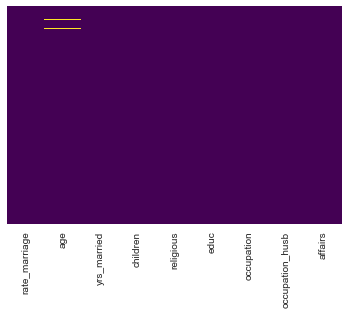

In [204]:
df = pd.read_csv("affairs2.csv")
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [205]:
df.age.unique()

array([32. , 27. , 22. , 37. ,  nan, 42. , 17.5])

In [206]:
df.dropna(inplace=True)

After dropping the NA, run the df.isnull().sum(), it should show 0 for every features

In [207]:
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

### Now, let's group by has or no affairs rows

In [209]:
df.groupby('had_affair').mean()

rate_marriage        age  yrs_married  children  religious  \
had_affair                                                               
0                4.329701  28.390679     7.989335  1.238813   2.504521   
1                3.647345  30.537019    11.152460  1.728933   2.261568   

                 educ  occupation_husb   affairs  
had_affair                                        
0           14.322977         3.833758  0.000000  
1           13.972236         3.884559  2.187243

So, one can see older woman who has married longer will have higher chance of having an affairs

We can also use Factorplot to see the effect from age

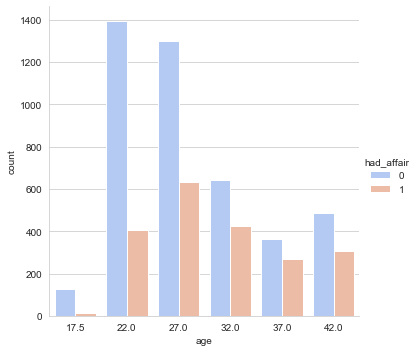

In [210]:
# Use Factorplot for age
sns.factorplot('age', kind='count', hue='had_affair', data=df,palette='coolwarm')

By looking at the ratio between the has_affair=1 versus has_affair=0, one can see that the older the woman, the higher the probability of having an affair

We can do the same thing for other variables such as years of marriage, number of children etc

### Question 6: Call factorplot for years of marriage, and number of children. Comment on whether you think they are importance factors

# They are factors because the more kids you have the more committed you are to a relationship, at least for the most part. But for the amount of years married it actually stays consistent. I guess people need to be adventurous who knows.

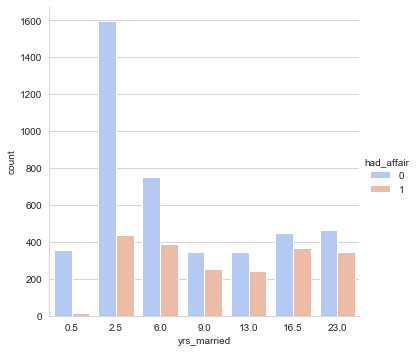

In [211]:
sns.factorplot('yrs_married', kind='count', hue='had_affair', data=df,palette='coolwarm')

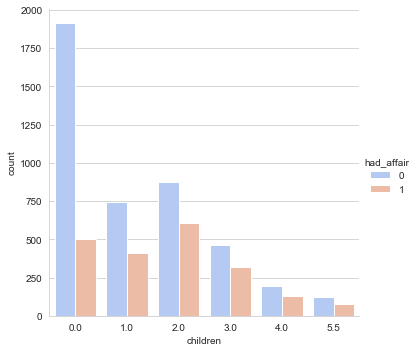

In [212]:
sns.factorplot(x='children', kind='count', hue='had_affair', data=df,palette='coolwarm')

### Question 7: build a logistic regression model with only Age, Number of years married, number of children, education, religious to forecast had_affair. Remember to do the Train Test Split first

type your work here

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [214]:
# Hint:
# create a df2 from df with all the age, years of married, ... columns
# call train_test_split, remember to drop the had_affair columns in your X variables, Y should be had_affair
# create a LogisticRegression object and call its fit method
# call the classification report and print accuracy score


In [215]:
df2=df[['age', 'children', 'educ', 'religious', 'had_affair', 'yrs_married']]

In [216]:
labels = np.array(df2['had_affair'])

In [217]:
df2 = df2.drop('had_affair', axis=1)
df2

age  children  educ  religious  yrs_married
0     32.0       3.0  17.0        3.0          9.0
1     27.0       3.0  14.0        1.0         13.0
2     22.0       0.0  16.0        1.0          2.5
3     37.0       4.0  16.0        3.0         16.5
4     27.0       1.0  14.0        1.0          9.0
...    ...       ...   ...        ...          ...
6466  32.0       2.0  17.0        3.0         13.0
6467  32.0       1.0  16.0        1.0         13.0
6468  22.0       0.0  14.0        2.0          2.5
6469  32.0       1.0  14.0        3.0          6.0
6470  22.0       0.0  16.0        2.0          2.5

[6366 rows x 5 columns]

In [218]:
train_features, test_features, train_labels, test_labels = train_test_split(df2, labels, test_size=0.2,random_state=0)

In [219]:
model = LogisticRegression()
model.fit(train_features,train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [220]:
predictions = model.predict(test_features)

In [221]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(test_labels, predictions))
print(accuracy_score(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       885
           1       0.55      0.18      0.27       389

    accuracy                           0.70      1274
   macro avg       0.64      0.56      0.54      1274
weighted avg       0.67      0.70      0.65      1274

0.7048665620094191


### Question 8: Now, call a countplot to show the dependence of the affair on occupation, then include the occupation categorical variable to build a better model

type your work here

In [222]:
# call sns.countplot for occupation using the original df dataframe

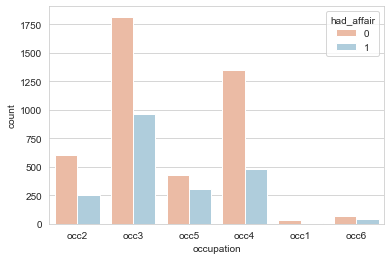

In [223]:
sns.set_style('whitegrid')
sns.countplot(x='occupation', hue='had_affair', data=df, palette='RdBu')

In [224]:
# call the get_dummies method for the occupation variable
sex=pd.get_dummies(df['occupation'],drop_first=True)

In [225]:
sex

occ2  occ3  occ4  occ5  occ6
0        1     0     0     0     0
1        0     1     0     0     0
2        0     1     0     0     0
3        0     0     0     1     0
4        0     1     0     0     0
...    ...   ...   ...   ...   ...
6466     0     0     1     0     0
6467     0     0     0     1     0
6468     0     1     0     0     0
6469     0     1     0     0     0
6470     1     0     0     0     0

[6366 rows x 5 columns]

In [226]:
# create a df3 which is combining df2 with this new set of dummy variables using pd.concat method

In [227]:
df3 = pd.concat([df2,sex], axis=1)

In [228]:
df3

age  children  educ  religious  yrs_married  occ2  occ3  occ4  occ5  \
0     32.0       3.0  17.0        3.0          9.0     1     0     0     0   
1     27.0       3.0  14.0        1.0         13.0     0     1     0     0   
2     22.0       0.0  16.0        1.0          2.5     0     1     0     0   
3     37.0       4.0  16.0        3.0         16.5     0     0     0     1   
4     27.0       1.0  14.0        1.0          9.0     0     1     0     0   
...    ...       ...   ...        ...          ...   ...   ...   ...   ...   
6466  32.0       2.0  17.0        3.0         13.0     0     0     1     0   
6467  32.0       1.0  16.0        1.0         13.0     0     0     0     1   
6468  22.0       0.0  14.0        2.0          2.5     0     1     0     0   
6469  32.0       1.0  14.0        3.0          6.0     0     1     0     0   
6470  22.0       0.0  16.0        2.0          2.5     1     0     0     0   

      occ6  
0        0  
1        0  
2        0  
3        0  
4        0  
...    ...  
6466     0  
6467     0  
6468     0  
6469     0  
6470     0  

[6366 rows x 10 columns]

In [229]:
# now you have a df3 with 10 features 
# call train test split and do the usual model fitting and model performance things

In [230]:
train_features, test_features, train_labels, test_labels = train_test_split(df3, labels, test_size=0.2, random_state=0)
model=LogisticRegression()
model.fit(train_features,train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [231]:
predictions = model.predict(test_features)

In [232]:
print(classification_report(test_labels,predictions))
print(accuracy_score(test_labels, predictions))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       885
           1       0.55      0.20      0.29       389

    accuracy                           0.70      1274
   macro avg       0.64      0.56      0.55      1274
weighted avg       0.67      0.70      0.65      1274

0.7048665620094191


## Question 9: Can you comment on your results based on the performance metrics (Precision, Recall and Accuracy Score)?

It is safe to assume that the model did not improve as much. The recall only had a score of 20%, and that is one of the higher percentages I have seen after running the program a few times. The precision and recall could be better, preferably at least 80% because that is what we aim for. The accuracy barely improved.  The f1 score takes calculations from recall/precision, so you expect that to be lower than expected as well.  